In [1]:
# pip install -r requirements.txt

# Importing Dependencies

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

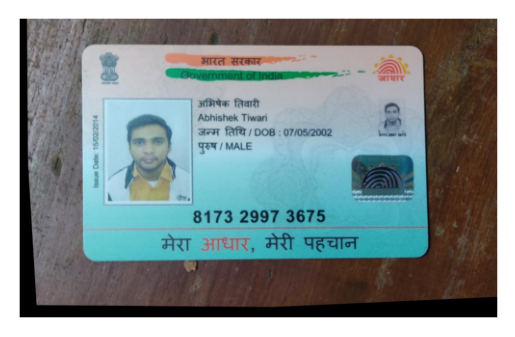

In [5]:
id_img = cv2.imread("data/id_image.png")
id_img = cv2.cvtColor(id_img, cv2.COLOR_BGR2RGB)

plt.figure()
plt.imshow(id_img)
plt.axis('off')
plt.show()

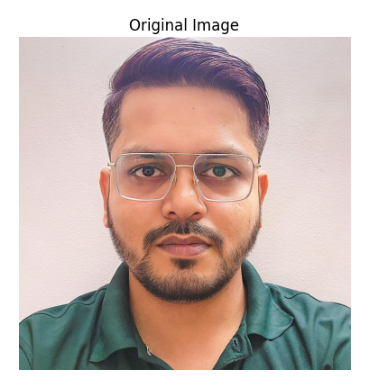

In [6]:
face_img = cv2.imread("data/face.png")
face_img = cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(face_img)
plt.axis("off")
plt.show()

# Preprocessing Images

In [7]:
def rgb_to_gray(rgb_image):
    # Extract the dimensions of the input image
    height, width, _ = rgb_image.shape
    
    # Create a grayscale image with the same dimensions as the input image
    gray_image = np.zeros((height, width), dtype=np.uint8)
    
    # Iterate over each pixel in the image
    for y in range(height):
        for x in range(width):
            # Extract the RGB values for the current pixel
            red, green, blue = rgb_image[y, x]
            
            # Convert RGB to grayscale using the formula
            gray_value = int(0.2989 * red + 0.5870 * green + 0.1140 * blue)
            
            # Set the grayscale value for the current pixel in the output image
            gray_image[y, x] = gray_value
    
    return gray_image

# load the RGB image
rgb_image = cv2.cvtColor(id_img, cv2.COLOR_BGR2RGB)

# Convert RGB image to grayscale
gray_image = rgb_to_gray(rgb_image)

# Display the original RGB image and the grayscale image
cv2.imshow('RGB Image', rgb_image)
cv2.imshow('Grayscale Image', gray_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1301: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


## bluring

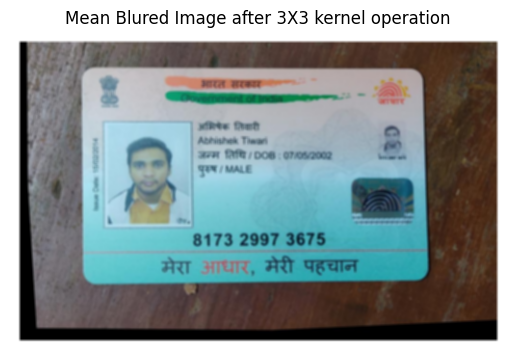

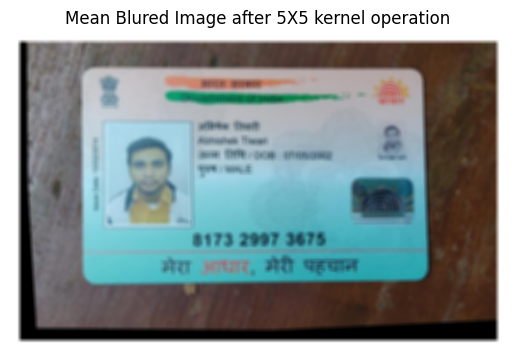

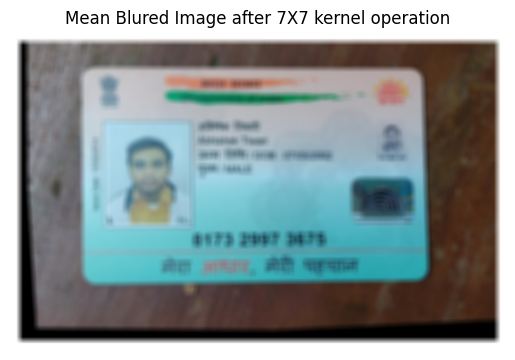

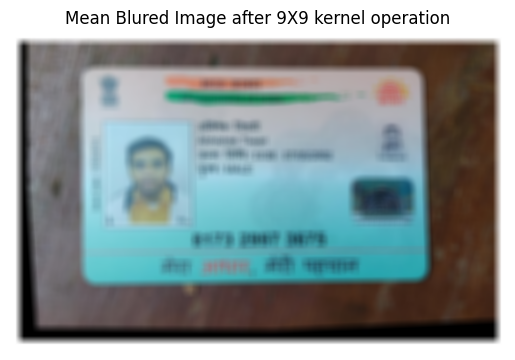

In [ ]:
# creating mean filter kernel
def meankernel(size):
    mk = np.ones((size, size), dtype = np.float32)/(size**2)
    return mk

# performing mean blur
for size in range(3, 10, 2):
    blur_img = cv2.filter2D(id_img , -1, meankernel(size))
    plt.figure()
    plt.imshow(blur_img)
    plt.title(f"Mean Blured Image after {size}X{size} kernel operation")
    plt.axis('off')
    plt.show()

In [ ]:
import numpy as np

def gaussian_kernel(sigma):
    kernel_size = 3
    kernel = np.zeros((kernel_size, kernel_size))
    center = kernel_size // 2
    normalization_factor = 1 / (2 * np.pi * sigma**2)
    # print(center)

    for i in range(kernel_size):
        for j in range(kernel_size):
            # x and y represent the distance of the current pixel from 
            # the center of the kernel in the horizontal and vertical directions, respectively.
            x = i - center
            y = j - center
            kernel[i, j] = normalization_factor*np.exp(-(x**2 + y**2) / (2 * sigma**2))
    
    # Normalize the kernel
    kernel /= np.sum(kernel)
    
    return kernel

# Example usage
sigma = 0.8
gaussian_kernel_3x3 = gaussian_kernel(sigma)
print("3x3 Gaussian Kernel:")
print(gaussian_kernel_3x3)

3x3 Gaussian Kernel:
[[0.05711826 0.12475775 0.05711826]
 [0.12475775 0.27249597 0.12475775]
 [0.05711826 0.12475775 0.05711826]]


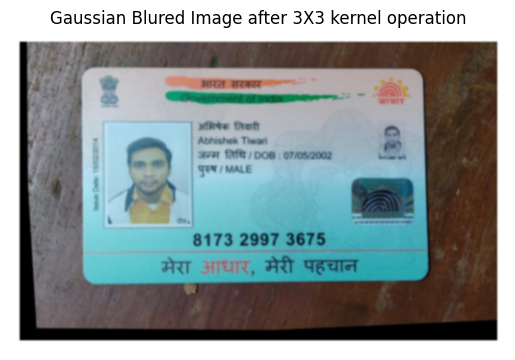

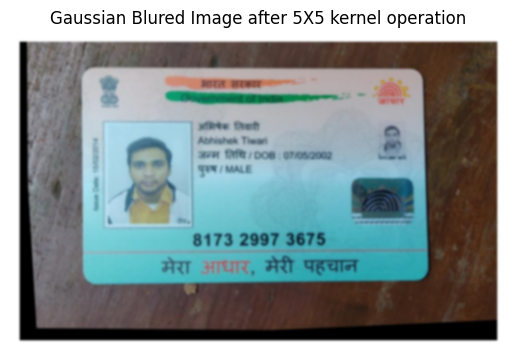

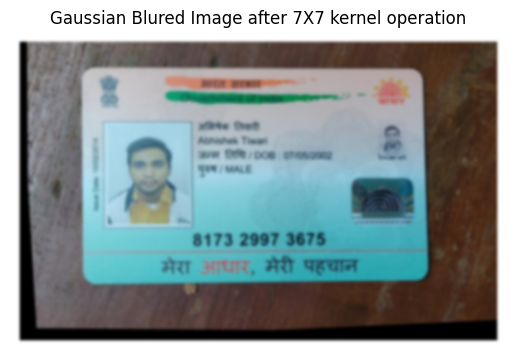

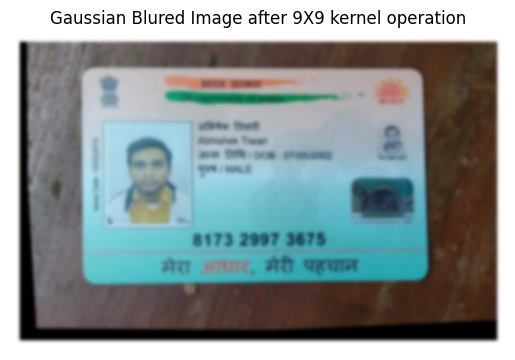

In [ ]:
for size in range(3, 10, 2):
    blur_img = cv2.GaussianBlur(id_img, (size, size), 0)
    plt.figure()
    plt.imshow(blur_img)
    plt.title(f"Gaussian Blured Image after {size}X{size} kernel operation")
    plt.axis('off')
    plt.show()

## Thresholding

### Histogram

In [ ]:
colors = ('b', 'g', 'r')

bgr_img_ravel = [id_img[:, :, 0].ravel(), id_img[:, :, 1].ravel(), id_img[:,:, 2].ravel()]
type(bgr_img_ravel[0])

numpy.ndarray

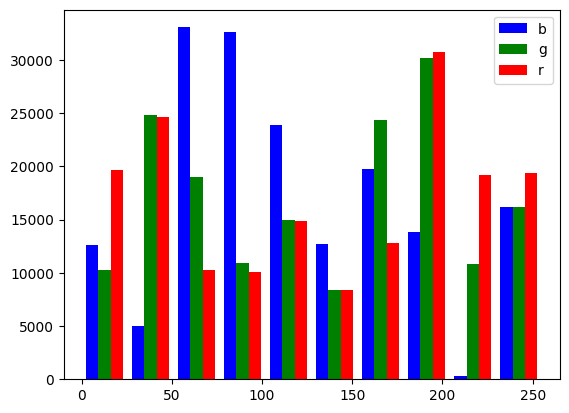

In [ ]:
plt.hist(bgr_img_ravel, color=colors, label=colors)
plt.legend()
plt.show()

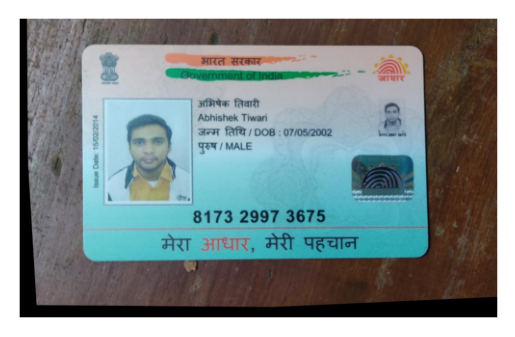

In [ ]:
plt.imshow(id_img)
plt.axis('off')
plt.show()

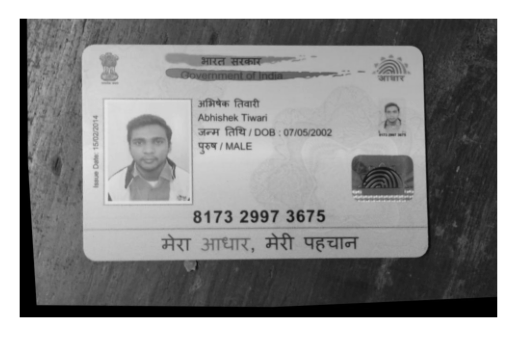

In [ ]:
# Gray Scale Conversion

gray =  cv2.cvtColor(id_img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.axis("off")
plt.show()

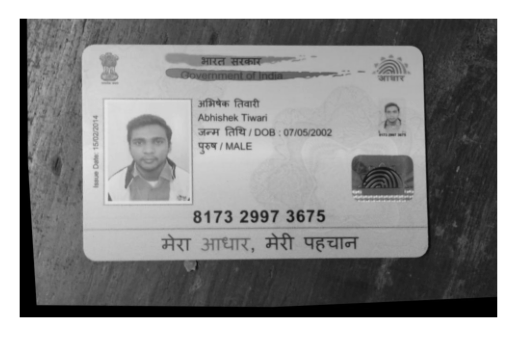

In [ ]:
blurred =  cv2.GaussianBlur(gray, (1,1), 0)

plt.imshow(blurred, cmap='gray')
plt.axis("off")
plt.show()

### Simple thresholding

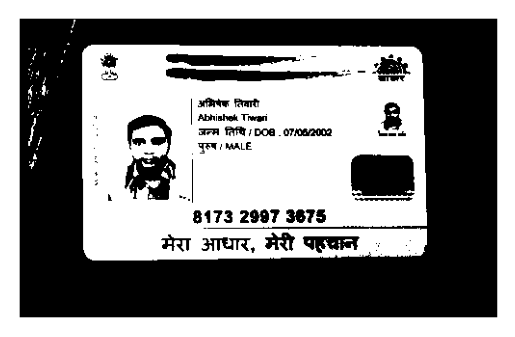

In [ ]:
T, thresh =  cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')
plt.axis("off")
plt.show()

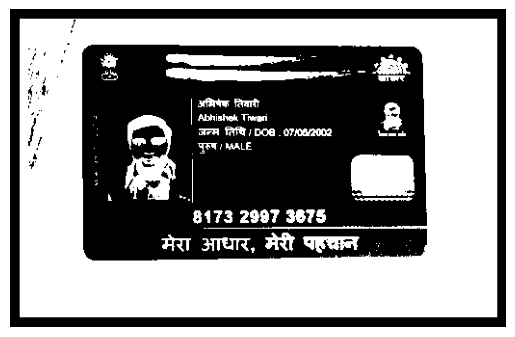

In [ ]:
T, threshInv =  cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)
plt.imshow(threshInv, cmap='gray')
plt.axis("off")
plt.show()

### Otsu thresholding
In the previous section on simple thresholding we needed to manually supply a threshold value of T. For simple images in controlled lighting conditions, it might be feasible for us to hardcode this value.

But in real-world conditions where we do not have any a priori knowledge of the lighting conditions, we actually automatically compute an optimal value of T using Otsu’s method.

[INFO] otsu's thresholding value: 126.0


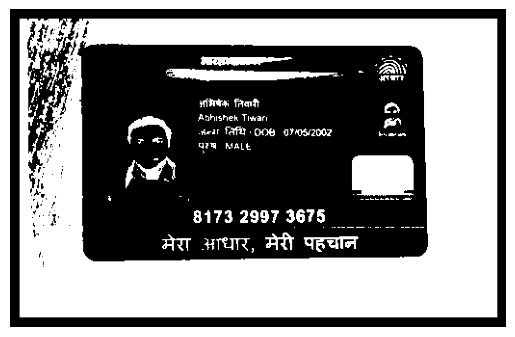

In [ ]:
(T, otsu_threshInv) = cv2.threshold(gray, 0, 255,
	cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

print("[INFO] otsu's thresholding value: {}".format(T))

plt.imshow(otsu_threshInv, cmap='Greys_r')
plt.axis("off")
plt.show()

### Adaptive Thresholding

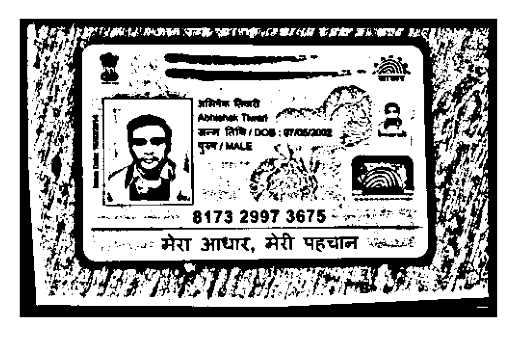

In [ ]:
adp_thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 2)

plt.imshow(adp_thresh, cmap='Greys_r')
plt.axis("off")
plt.show()

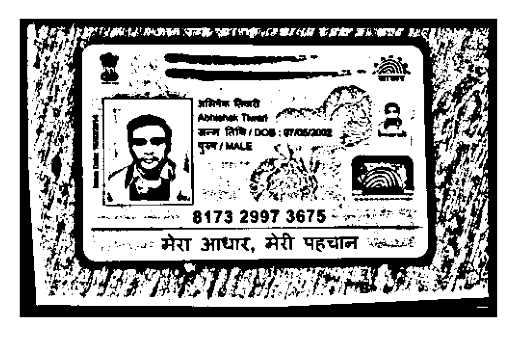

In [ ]:
thresh = cv2.adaptiveThreshold(gray, 255,
	cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,59, 3)
plt.imshow(adp_thresh, cmap='Greys_r')
plt.axis("off")
plt.show()

## Edge Detection

In [ ]:
edges = cv2.Canny(image=blurred,threshold1=100,threshold2=200)

cv2.imshow('Canny Edge Detection',edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Contour Detection

Using Contour we crop the image to remove the background and only get the image of the ID-card.

**`cv2.RETR_LIST`** - retrieves all of the contours without establishing any hierarchical relationships.

so we sort the contours and find which contour gives the best cropped image

Contour 1 - Bounding rectangle: (x=0, y=0, w=515, h=330)
Contour 1 - Area: 169106.0


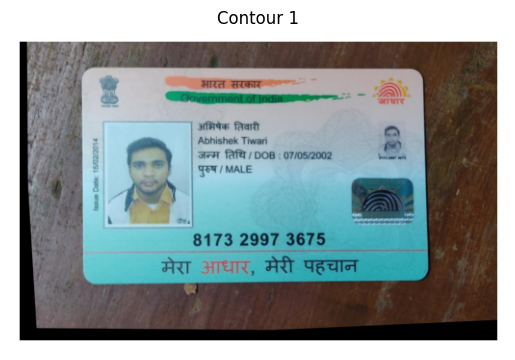

Contour 2 - Bounding rectangle: (x=9, y=9, w=498, h=312)
Contour 2 - Area: 154565.0


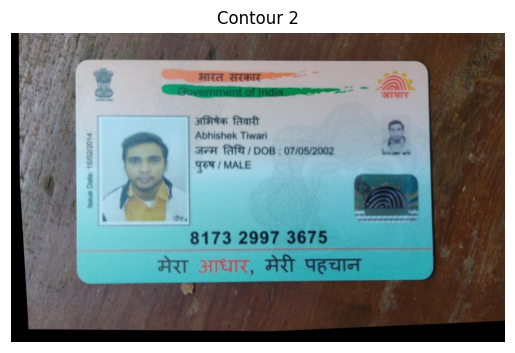

Contour 3 - Bounding rectangle: (x=73, y=33, w=361, h=229)
Contour 3 - Area: 78386.5


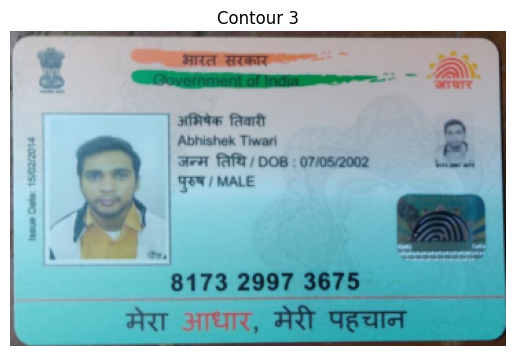

Contour 4 - Bounding rectangle: (x=18, y=15, w=479, h=294)
Contour 4 - Area: 30967.5


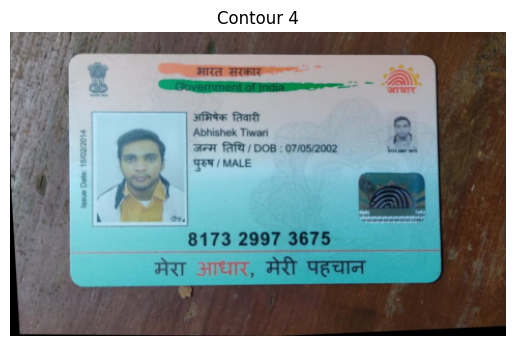

Contour 5 - Bounding rectangle: (x=94, y=83, w=98, h=125)
Contour 5 - Area: 11036.0


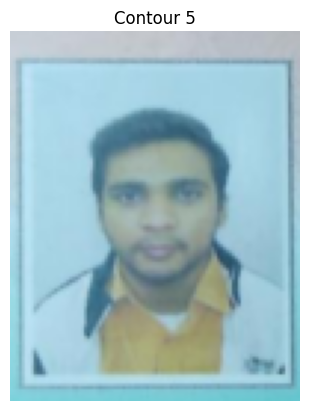

Contour 6 - Bounding rectangle: (x=98, y=94, w=91, h=109)
Contour 6 - Area: 9578.0


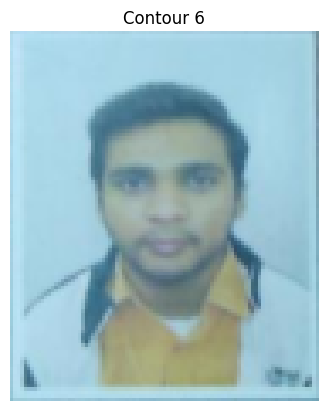

Contour 7 - Bounding rectangle: (x=118, y=108, w=56, h=92)
Contour 7 - Area: 3983.0


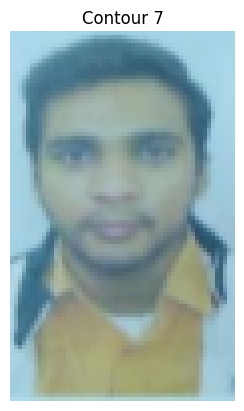

Contour 8 - Bounding rectangle: (x=353, y=150, w=68, h=45)
Contour 8 - Area: 2671.0


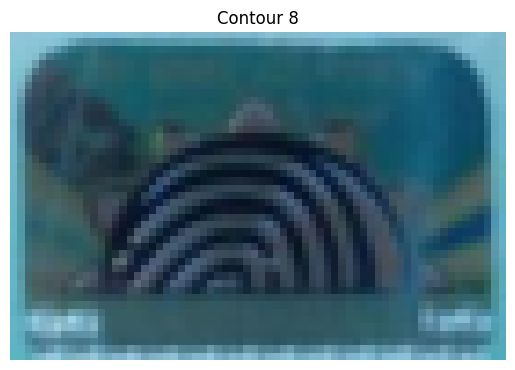

Contour 9 - Bounding rectangle: (x=160, y=60, w=196, h=16)
Contour 9 - Area: 1822.5


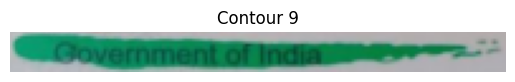

Contour 10 - Bounding rectangle: (x=159, y=45, w=150, h=15)
Contour 10 - Area: 1302.5


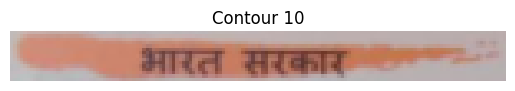

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Find contours in the thresholded image using RETR_TREE
contours, hierarchy = cv2.findContours(adp_thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_SIMPLE)

# Sort contours by area in descending order
contours = sorted(contours, key=cv2.contourArea, reverse=True)

# Check if there are at least three contours
num_contours_to_plot = min(10, len(contours))

# Plot the first three contours
for i in range(num_contours_to_plot):
    contour = contours[i]
    area = cv2.contourArea(contour)
    
    # Get the bounding rectangle for the contour
    x, y, w, h = cv2.boundingRect(contour)
    
    # Print the bounding rectangle coordinates and area of the contour
    print(f"Contour {i+1} - Bounding rectangle: (x={x}, y={y}, w={w}, h={h})")
    print(f"Contour {i+1} - Area: {area}")
    
    # Crop the contour from the image using the bounding rectangle
    contour_img = id_img[y:y+h, x:x+w]
    
    # Display the cropped contour
    plt.figure()
    plt.imshow(contour_img)
    plt.title(f"Contour {i+1}")
    plt.axis('off')
    plt.show()



In [ ]:
# Get the bounding rectangle for the contour
x, y, w, h = cv2.boundingRect(contours[2])

# Crop the contour from the image using the bounding rectangle
contour_img = id_img[y:y+h, x:x+w]
contour_img= cv2.cvtColor(contour_img, cv2.COLOR_RGB2BGR)

cv2.imwrite('data/id_image_preprocessed.png', contour_img)

True